In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
assert tf.__version__.startswith('2')
import os
import  cv2
from sklearn import metrics
from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

In [3]:
os.listdir('/Users/elgem/Desktop/cammlx90640')### se debe de recopilar imagenes para los datos de entrenamiento

image_path='/Users/elgem/Desktop/cammlx90640'
image_path=os.path.join(os.path.dirname(image_path),'cammlx90640')


In [4]:
data = DataLoader.from_folder(image_path)
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

INFO:tensorflow:Load image with size: 3119, num_label: 3, labels: ambiente, objetos, persona.


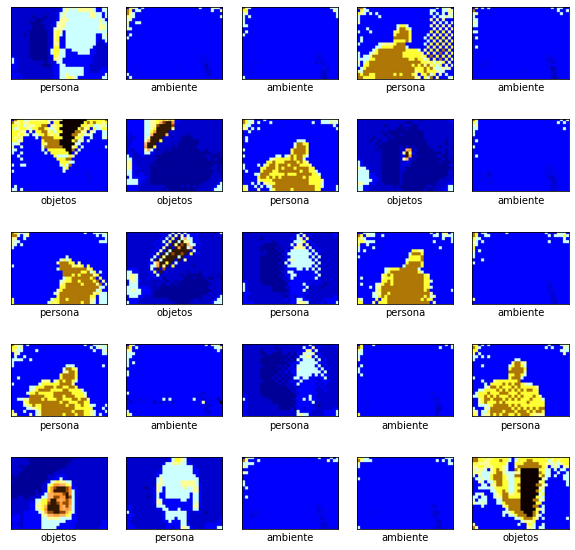

In [5]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [6]:
model = image_classifier.create(train_data, validation_data=validation_data)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 3,416,867
Trainable params: 3,843
Non-trainable params: 3,413,024
_________________________________________________________________
None


C:\Users\elgem\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/5
77/77 [==============================] - 45s 542ms/step - loss: 0.6783 - accuracy: 0.7520 - val_loss: 0.5264 - val_accuracy: 0.8686
Epoch 2/5
77/77 [==============================] - 60s 776ms/step - loss: 0.5281 - accuracy: 0.8661 - val_loss: 0.4811 - val_accuracy: 0.9199
Epoch 3/5
77/77 [==============================] - 49s 633ms/step - loss: 0.5007 - accuracy: 0.8908 - val_loss: 0.4591 - val_accuracy: 0.9455
Epoch 4/5
77/77 [==============================] - 50s 656ms/step - loss: 0.4795 - accuracy: 0.9075 - val_loss: 0.4442 - val_accuracy: 0.9455
Epoch 5/5
77/77 [==============================] - 50s 649ms/step - loss: 0.4725 - accuracy: 0.9058 - val_loss: 0.4339 - val_accuracy: 0.9455


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 3,416,867
Trainable params: 3,843
Non-trainable params: 3,413,024
_________________________________________________________________


In [8]:
loss, accuracy = model.evaluate(test_data)

10/10 [==============================] - 7s 584ms/step - loss: 0.4171 - accuracy: 0.9551


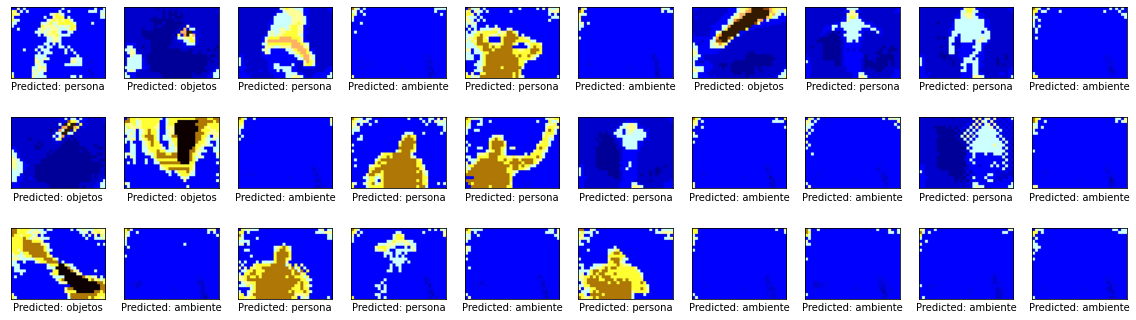

In [13]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))

predicts = model.predict_top_k(test_data)

for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(30)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]

  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

PRUEBA

persona detectada


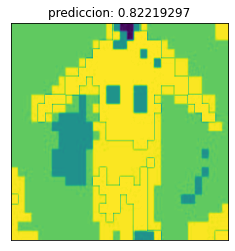

In [17]:

img=cv2.imread('do.jpg')

img=cv2.resize(img,(224,224))

patron= img.reshape(1,224,224,3)/255

number = model.predict_top_k(patron)

imd=number[0][0][1]
imd2=number[0][0][1]
if imd < 0.82:
   print('no es persona') 
else:
   print('persona detectada')    

plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(patron[0,:,:,0])
plt.title('prediccion: ' +str(imd))
plt.show()


TERMIAN PRUEBA

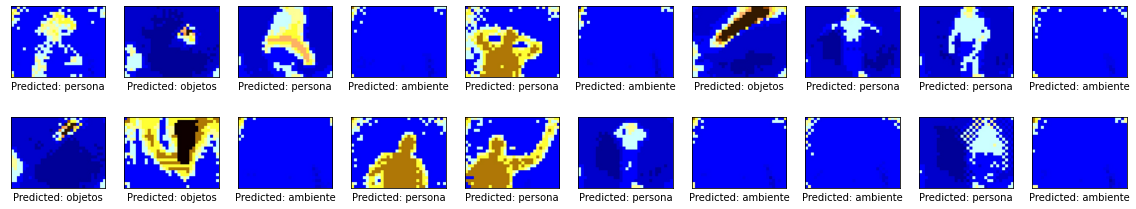

In [18]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))

predicts = model.predict_top_k(test_data)

for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(20)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]

  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [21]:
model.export(export_dir='.')

INFO:tensorflow:Assets written to: C:\Users\elgem\AppData\Local\Temp\tmptd33wdja\assets


INFO:tensorflow:Assets written to: C:\Users\elgem\AppData\Local\Temp\tmptd33wdja\assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in C:\Users\elgem\AppData\Local\Temp\tmpp1kwukdl\labels.txt


INFO:tensorflow:Saving labels in C:\Users\elgem\AppData\Local\Temp\tmpp1kwukdl\labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: .\model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: .\model.tflite


In [22]:
model.evaluate_tflite('model.tflite', test_data)

KeyboardInterrupt: 

In [23]:
import tensorflow.lite as tflite
#import cv2
#import numpy as np
#import matplotlib.pyplot as plt

TFLITE_FILE_PATH = '/Users/elgem/Desktop/lectura sensor/model.tflite'
interpreter =  tflite.Interpreter(TFLITE_FILE_PATH)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

#input_shape = input_details[0]['shape']
#input_data = np.array(np.random.random_sample(input_shape), dtype=np.uint8)
#interpreter.set_tensor(input_details[0]['index'], input_data)

#interpreter.invoke()

#output_data = interpreter.get_tensor(output_details[0]['index'])
#print(output_data)

In [36]:
img=cv2.imread('a.jpg')

img=cv2.resize(img,(224,224))

#img= img.reshape(1,224,224,3)/255

input_shape = input_details[0]['shape']
input_tensor= np.array(np.expand_dims(img,0))

In [37]:
input_index = interpreter.get_input_details()[0]["index"]
interpreter.set_tensor(input_index, input_tensor)
interpreter.invoke()
output_details = interpreter.get_output_details()

ambiente


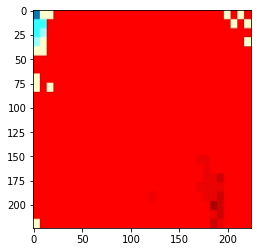

In [38]:
output_data = interpreter.get_tensor(output_details[0]['index'])
pred = np.squeeze(output_data)
highest_pred_loc = np.argmax(pred)

class_ind={
  0: 'ambiente',
  1: 'objeto',
  2: 'persona'}
            


preds = class_ind[highest_pred_loc]
plt.imshow(img)
print(preds)